In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt

In [18]:
#REVIEWING THE DATA
X = pd.read_csv('Iris.csv')
X.head(50)


,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


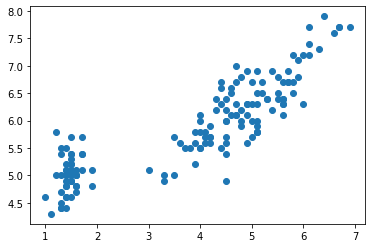

In [4]:
#PLOTTING THE RAW DATA
plt.scatter(X['Petal Length Cm'], X['Sepal Length Cm'])

In [5]:
#INITIALIZING THE CENTROIDS
K = 3
Centroids = (X.sample(n=K))
Centroids

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
104,105,6.5,3.0,5.8,2.2,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica


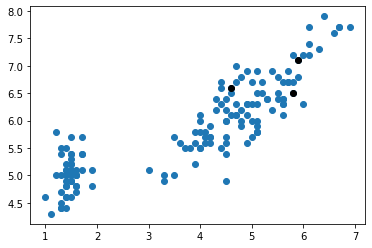

In [6]:
#PLOTTING CENTROIDS 
plt.scatter(X['Petal Length Cm'], X['Sepal Length Cm'])
plt.scatter(Centroids['Petal Length Cm'], Centroids['Sepal Length Cm'], c = 'k')

In [14]:
#CALCULATING THE DIFFERENCE AND SUMMING NEW CENTROIDS BY USING AVERAGE.
diff = 1
j = 0
while(diff == 0):
    XD = X
    i = 1
    for index1,row_c in Centroids.iterrows():
        ED = []
        for index2,row_d in XD.iterrows():
            d1 = (row_c["Petal Length Cm"] - row_d["Sepal Length Cm"])**2
            d2 = (row_c["Petal Length Cm"] - row_d["Sepal Length Cm"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    C = []
    for index,row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Clust"] = C
    Centroids_new = X.groupby(["Clust"]).mean()[["Sepal Length Cm", "Petal Length Cm"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Sepal Length Cm'] - Centroids['Sepal Length Cm']).sum()+(Centroids_new['Petal Length Cm'] - Centroids['Petal Length Cm'])
        print(diff,)
    Centroids = X.groupby(["Clust"]).mean()[["SepalLengthCm", "PetalLengthCm"]]

In [15]:
Centroids

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
104,105,6.5,3.0,5.8,2.2,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica


Text(0, 0.5, 'Sepal Length Cm')

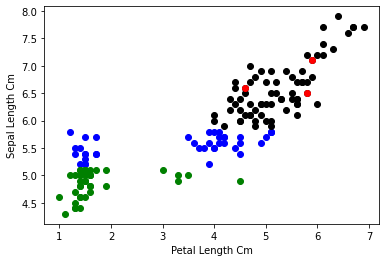

In [16]:
#PRINTING FINAL CLUSTER
color = ['b', 'g', 'k']
for k in range(K):
    data = X[X["Clust"] == k + 1]
    plt.scatter(data['Petal Length Cm'], data['Sepal Length Cm'], c = color[k])
plt.scatter(Centroids['Petal Length Cm'], Centroids['Sepal Length Cm'], c = 'r')
plt.xlabel('Petal Length Cm')
plt.ylabel('Sepal Length Cm')
